# Logistic Regression Project 

In this project we will work with fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. 

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
ad = pd.read_csv('advertising.csv')

In [3]:
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_34676\408274819.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ad['Age'],kde=False)


<AxesSubplot:>

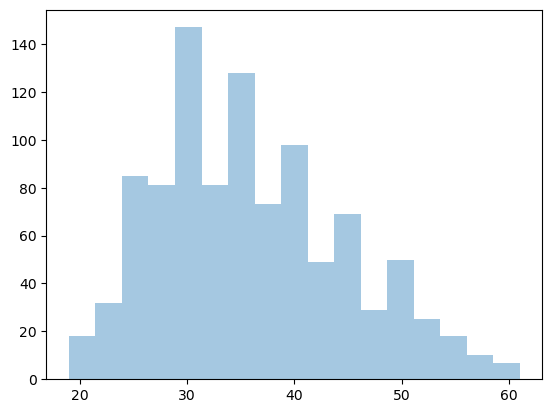

In [6]:
sns.distplot(x=ad['Age'],kde=False)

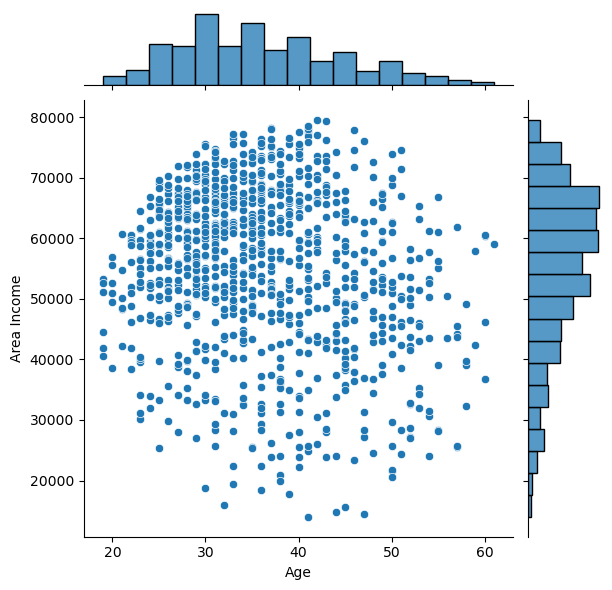

In [7]:
sns.jointplot(y='Area Income',x ='Age',data=ad)

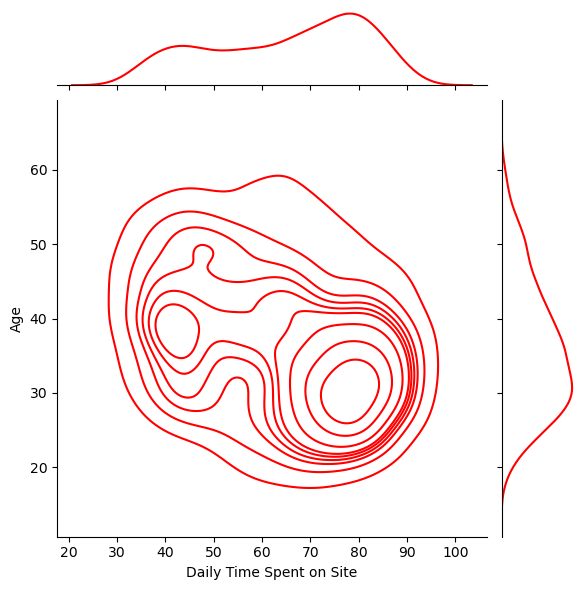

In [8]:
sns.jointplot(y='Age',x='Daily Time Spent on Site',data=ad,color='red',kind='kde',palette='rocket')

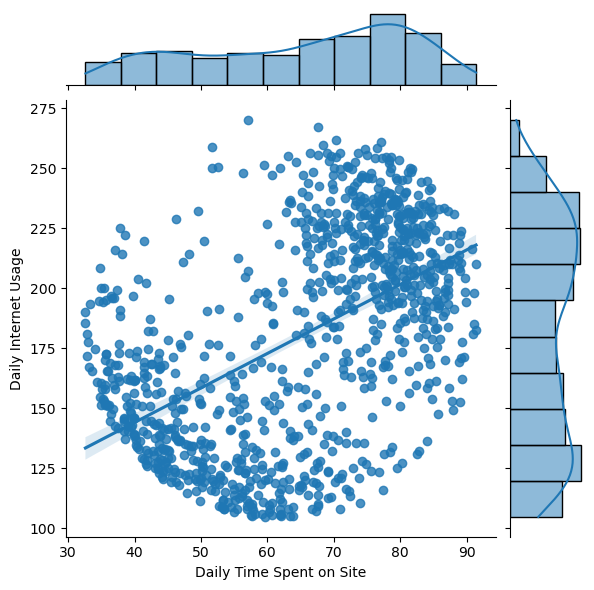

In [9]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad,kind='reg')

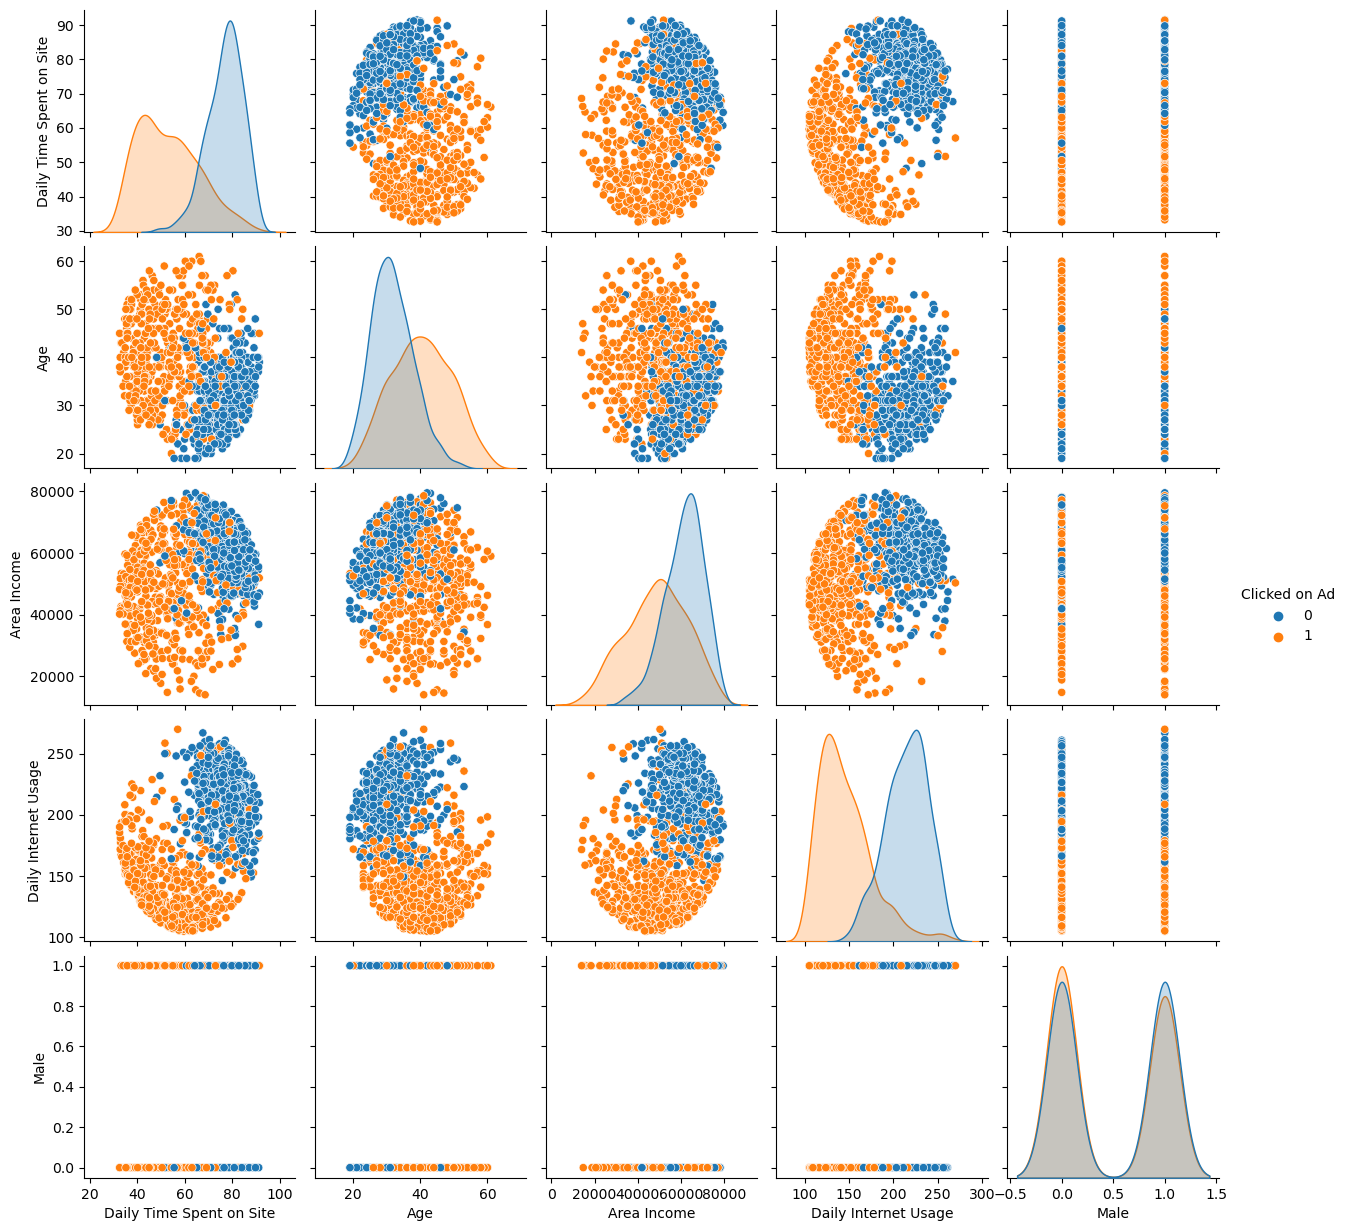

In [10]:
sns.pairplot(data= ad,hue='Clicked on Ad')

# Logistic Regression

In [11]:
city = pd.get_dummies(ad['City'],drop_first=True)
city

,Adamside,Adamsstad,Alanview,Alexanderfurt,Alexanderview,Alexandrafort,Alexisland,Aliciatown,Alvaradoport,Alvarezland,...,Wintersfort,Wongland,Wrightburgh,Wrightview,Yangside,Youngburgh,Youngfort,Yuton,Zacharystad,Zacharyton
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
country = pd.get_dummies(ad['Country'],drop_first=True)

In [13]:
ad = pd.concat([ad,city,country],axis=1)

In [14]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Adamside,Adamsstad,Alanview,Alexanderfurt,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,0.001000,0.001000,0.001000,0.001000,...,0.005000,0.002000,0.006000,0.007000,0.003000,0.004000,0.007000,0.003000,0.004000,0.006000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,0.031623,0.031623,0.031623,0.031623,...,0.070569,0.044699,0.077266,0.083414,0.054717,0.063151,0.083414,0.054717,0.063151,0.077266
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
ad.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1,inplace=True)

In [16]:
X = ad.loc[ : , ad.columns != 'Clicked on Ad']


In [17]:
Y = ad['Clicked on Ad']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [20]:
x_train.astype('int')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Adamside,Adamsstad,Alanview,Alexanderfurt,Alexanderview,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
290,50,31,72270,171,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,86,31,53767,219,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
486,83,40,66291,158,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683,76,28,67990,192,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
876,67,44,51257,107,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,48,54,53188,134,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
838,44,40,33601,128,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,75,28,59998,233,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,67,43,68447,128,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
x_test.astype('int')
y_test.astype('int')
y_train.astype('int')

290    1
167    0
486    0
683    0
876    1
      ..
575    1
838    1
337    0
523    1
863    0
Name: Clicked on Ad, Length: 700, dtype: int32

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
pred = model.predict(x_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [28]:
print(confusion_matrix(y_test,pred))

[[149   8]
 [ 14 129]]


In [31]:
print("Accuracy: ",round(accuracy_score(y_test,pred),2)*100,"%")

Accuracy:  93.0 %
